In [1]:
from strsimpy.normalized_levenshtein import NormalizedLevenshtein
import matplotlib.pyplot as plt
import numpy as np

normalized_levenshtein = NormalizedLevenshtein()
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))

print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))
# get original transcript

0.1
0.1
0.1
0.9
0.9
0.9


In [2]:
transcript_id = '10_0991_331330'
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer

def read_transcript_from_id(transcript_id):

    path_to_data_folder = '/archive/shared/sim_center/shared/ameer/'
    # lookinto this dictionary to find the path
    # can also manually create the path and it would be faster but not by much
    merged_lookup = pd.read_csv(path_to_data_folder + 'grade_lookupv5.csv')
    transcript = ''

    path = merged_lookup[merged_lookup.id == transcript_id].path.iloc[0]
    with open(path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if line != '\n':
            tok_line = line.split(' ')
            for i in range(len(tok_line)):
                transcript += ' ' + tok_line[i]


    return transcript

In [3]:
diarized_transcript = '/archive/shared/sim_center/shared/annie/GPT4 3-chunk/'
id = '01_0542_298135'
def reconstruct_transcript(path, id): 
    path = path + id + '.txt'
    with open(path, 'r') as file:
        lines = file.readlines()
 
    out = []
    
    for line in lines:
        if line.find(':')==-1: continue
        temp = {}
        temp['speaker'] = line[:line.find(':')]
        temp['text'] = line[line.find(':') + 1: ]
        out.append(temp)

    return out

In [4]:
def consolidate_transcript(transcript):
    
    new = []
    new.append({'speaker': transcript[0]['speaker'], 'text': transcript[0]['text']})
    
    for i in range(1, len(transcript)):
        this = {}
        if transcript[i]['speaker'] == transcript[i-1]['speaker']:
            new[-1]['text'] += transcript[i]['text']
        else:
            this['speaker'] = transcript[i]['speaker']
            this['text'] = transcript[i]['text']
            new.append(this)
    
    return new

In [5]:
def extract_text(transcript):
    out = ''
    for line in transcript:
        out += line['speaker'] + line['text']
    return out


In [6]:

def eval_transcript(ids, diar_path='/archive/shared/sim_center/shared/annie/GPT4 3-chunk/', 
                    gold_path = '/archive/shared/sim_center/shared/annie/gpt4-gold-standard-diarized/'):
    scores = {}
    for id in ids:
        # debugging statement: 
        print(id) 
        diar = extract_text(consolidate_transcript(reconstruct_transcript(diar_path, id)))
        gold = extract_text(consolidate_transcript(reconstruct_transcript(gold_path, id)))
        distance = normalized_levenshtein.distance(diar, gold)
        similarity = normalized_levenshtein.similarity(diar, gold)
        scores[id] = [distance, similarity]
    return scores



In [7]:
def save_scores(scores, ids, path = '/archive/shared/sim_center/shared/annie/levenshtein-scores/', run_name = 'gpt4'):
    with open(path + run_name + ".txt", "w") as outfile:
        for id in ids:
            outfile.write('ID: ' + id + ', distance: ' + str(scores[id][0]) + ', similarity: ' + str(scores[id][1]) + '\n')

In [8]:
id_set1 = ['01_0542_298135',
'02_0036_174595',
'03_0028_174553',
'04_0043_174686',
'05_0033_174804',
'06_0079_175106',
'07_0068_174641',
'08_0029_174576',
'09_0029_174582',
'10_0991_331330']

In [10]:
diar_path = '/archive/shared/sim_center/shared/annie/gpt4o/'
g4o_score = eval_transcript(id_set1, diar_path=diar_path)
save_scores(g4o_score, id_set1, run_name='gpt4o')

01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330


In [9]:
diar_path = '/archive/shared/sim_center/shared/annie/gpt4o-nosum/'
g4o_score = eval_transcript(id_set1, diar_path=diar_path)
save_scores(g4o_score, id_set1, run_name='gpt4o-nosum')

diar_path = '/archive/shared/sim_center/shared/annie/gpt4-3chunk-nosum/'
g4o_score = eval_transcript(id_set1, diar_path=diar_path)
save_scores(g4o_score, id_set1, run_name='gpt4-3chunk-nosum')

diar_path = '/archive/shared/sim_center/shared/annie/gpt4-1chunk-nosum/'
g4o_score = eval_transcript(id_set1, diar_path=diar_path)
save_scores(g4o_score, id_set1, run_name='gpt4-1chunk-nosum')

diar_path = '/archive/shared/sim_center/shared/annie/claude-opus-nosum/'
g4o_score = eval_transcript(id_set1, diar_path=diar_path)
save_scores(g4o_score, id_set1, run_name='claude-opus-nosum')

01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330
01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330
01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641


KeyboardInterrupt: 

In [18]:
diar_path = '/archive/shared/sim_center/shared/annie/GPT3.5 complete/'
gpt35_score = eval_transcript(id_set1, diar_path=diar_path)
save_scores(gpt35_score, id_set1, run_name='gpt35')

diar_path = '/archive/shared/sim_center/shared/annie/mixtral/'
mixtral_score = eval_transcript(id_set1, diar_path=diar_path)
save_scores(mixtral_score, id_set1, run_name='mixtral')

diar_path = '/archive/shared/sim_center/shared/annie/GPT4 3-chunk/'
gpt4_score = eval_transcript(id_set1, diar_path=diar_path)
save_scores(gpt4_score, id_set1, run_name='gpt4_3chunk_original')

diar_path = '/archive/shared/sim_center/shared/annie/claude-sonnet/'
claude_sscore = eval_transcript(id_set1, diar_path=diar_path)
save_scores(claude_sscore, id_set1, run_name='claude_sonnet')

diar_path = '/archive/shared/sim_center/shared/annie/claude-opus/'
claude_oscore = eval_transcript(id_set1, diar_path=diar_path)
save_scores(claude_oscore, id_set1, run_name='claude_opus')

01_0542_298135


02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330
01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330
01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330
01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330
01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330


In [19]:
diar_path = '/archive/shared/sim_center/shared/annie/GPT4 6-chunk/'
gpt4_6chunk = eval_transcript(id_set1, diar_path=diar_path)
save_scores(gpt4_6chunk, id_set1, run_name='gpt4_original_6chunk')

diar_path = '/archive/shared/sim_center/shared/annie/GPT4 9-chunk/'
gpt4_9chunk = eval_transcript(id_set1, diar_path=diar_path)
save_scores(gpt4_9chunk, id_set1, run_name='gpt4_original_9chunk')

01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330
01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330


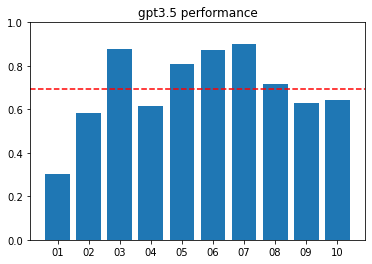

In [49]:
gpt35 = np.mean([gpt35_score[token][1] for token in gpt35_score])
mixtral = np.mean([mixtral_score[token][1] for token in mixtral_score])
measures = ['distance', 'similarity']
plt.bar([id[:2] for id in id_set1], [gpt35_score[token][1] for token in gpt35_score])
plt.axhline(y = gpt35, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.title("gpt3.5 performance")
plt.show()

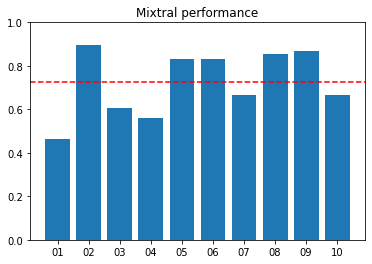

In [51]:
plt.bar([id[:2] for id in id_set1], [mixtral_score[token][1] for token in mixtral_score])
plt.axhline(y = mixtral, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.title("Mixtral performance")
plt.show()

In [19]:
diar_path = '/archive/shared/sim_center/shared/annie/claude-opus/'
claude_oscore = eval_transcript(id_set1, diar_path=diar_path)

01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330


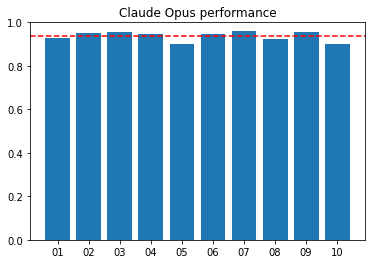

In [20]:
claude_o = np.mean([claude_oscore[token][1] for token in claude_oscore])
plt.bar([id[:2] for id in id_set1], [claude_oscore[token][1] for token in claude_oscore])
plt.axhline(y = claude_o, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.title("Claude Opus performance")
plt.show()

In [17]:
diar_path = '/archive/shared/sim_center/shared/annie/gpt4o/'
g4o_score = eval_transcript(id_set1, diar_path=diar_path)

01_0542_298135


02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330


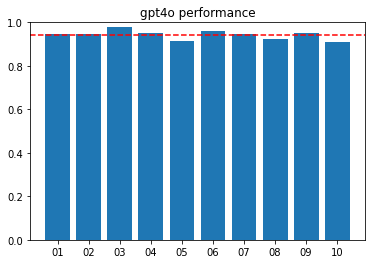

In [19]:
g4o = np.mean([g4o_score[token][1] for token in g4o_score])
plt.bar([id[:2] for id in id_set1], [g4o_score[token][1] for token in g4o_score])
plt.axhline(y = g4o, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.title("gpt4o performance")
plt.show()

In [21]:
diar_path = '/archive/shared/sim_center/shared/annie/gpt4_3chunk_pass2/'
g4_3chunk = eval_transcript(id_set1, diar_path=diar_path)

01_0542_298135


02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330


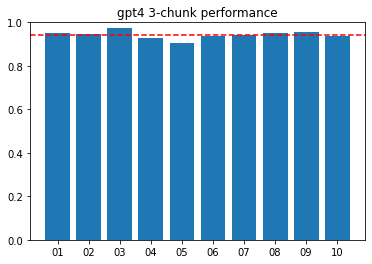

In [22]:
g4_3 = np.mean([g4_3chunk[token][1] for token in g4_3chunk])
plt.bar([id[:2] for id in id_set1], [g4_3chunk[token][1] for token in g4_3chunk])
plt.axhline(y = g4_3, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.title("gpt4 3-chunk performance")
plt.show()

In [31]:
save_scores(g4_3chunk, id_set1, run_name='gpt4_3chunk')

01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330


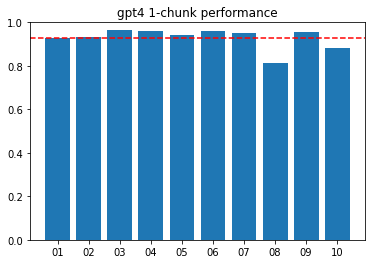

In [33]:
diar_path = '/archive/shared/sim_center/shared/annie/gpt4-1chunk/'
g4_1chunk = eval_transcript(id_set1, diar_path=diar_path)
save_scores(g4_1chunk, id_set1, run_name='gpt4_1chunk')
g4_1 = np.mean([g4_1chunk[token][1] for token in g4_1chunk])
plt.bar([id[:2] for id in id_set1], [g4_1chunk[token][1] for token in g4_1chunk])
plt.axhline(y = g4_1, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.title("gpt4 1-chunk performance")
plt.show()